## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>
<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>
The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:
- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

Bir data setinde feature'lari tanimak oldukca onemlidir. Ne ile hangi verilerle ugrastigimizi bilmemiz gereklidir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"]=(10,6)   # Grafigin boyutlarini belirler bizim ayrica belirtmedigimiz durumlarinda
sns.set_style("whitegrid")     # Grafigin arka planini belirler bizim ayrica belirtmedigimiz durumlarinda
pd.set_option("display.float_format", lambda x: '%.2f'  %x)  # Float degerlerin ondalik kisimlarinda son iki basamak gosterir

pd.options.display.max_rows=150   # Data Frame'lerin 150 satirini goster
pd.options.display.max_columns=100  # Data Frame'lerin 100 sutununu goster

import warnings 
warnings.filterwarnings("ignore")   # Warnings uyarilarini gosterme
warnings.warn("thisnwill not show")  # Uyari yerine bu yaziyi goster

In [2]:
df = pd.read_csv("adult_eda.csv")  
df.head()
# Ayni dosyada olmasi csv'de okutmak icin kolaylik saglar. Aksi halde path vermek gereklidir. 
# Ayni dosya icerisinde olursa path vermeye gerek kalmaz
# Ilerideki konularda bu sutunlar icerisinde bir tane hedef sutunumuz olacak. Biz diger sutundaki bilgileri verecegiz makinenin
# bize hedef sutun ile ilgili tahminde bulunmasini isteyecegiz.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  (EDA)

In [3]:
df.info()
# Ilk olarak EDA yaparken datayi anlamaya, dusurmemiz gereken sutunlari bulmaya, non degerleri belirlemeye dikkat edilmelidir.
# Neleri kurtarabilirim bu konular EDA'nin konusudur.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape
# Benim elimde ne kadar kac sutun data vardir.

(32561, 15)

In [5]:
df.describe().T
# Genellikle Tranpoze ile bakilir. Describe numeric columns'lari inceler. Sayisal degerlere bakar. Bize bu sutunlarla ilgili bilgiler verir.
# Istatistik degerler cikarir. Bu degerlerde non olsa da hesaplama yapar. 

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education-num,31759.00,10.08,2.58,1.00,9.00,10.00,12.00,16.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [6]:
df.isnull().sum()
# Non degerlere bakmak icin kullanilir. sum() ile kullanmak daha iyidir. Sutun sutun getirir.

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [7]:
df.isna().sum()
# Non degerlere bakmak icin kullanilir. sum() ile kullanmak daha iyidir. Sutun sutun getirir.

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df["workclass"].value_counts()
# Tek bir sutuna bakmak icin kullanilan bir yontemdir. Sutun icerigindeki degerleri toplayarak bize getirir.

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.workclass = df.workclass.str.replace("?","UNKNOWN")  # Genelde bu yontem kullanilir
#df.workclass.str.replace("?","UNKNOWN", inplace = True)
# Tek bir sutundaki belirledigimiz bir degeri istedigimiz baska bir degerle degistirir.Bu sekilde direkt atama yaparak 
# kalici degisiklik yapabiliriz Ya da inplace = True seklinde de yapabiliriz.

In [11]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
UNKNOWN              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
object_col = df.select_dtypes(include = 'object')
# Data type'i object olanlari secme methodudur. Sadece object'lerden olusan bir DF dondurur.

In [13]:
for col in object_col:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna = False))
    print("--"*10)
# Bu for dongusu Df deki columns'lar icerisinde ne tur degerlerin oldugunu dondurur. 
# Non veya istemedigimiz degerlerin varligina bakmak icin kullanilabilir.

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
UNKNOWN              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [14]:
df.isin(['?'])
# DF icerisinde arama yapmak icin kullanilir. Aramak istedigimiz degeri belirterek Df icerisinde olan her bir degeri getirir.
# Bu sekilde kullanimda her bir deger icin karsilastirmasini yaparak bize genel bir sonuc dondurur.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isin(['?']).sum()
# Bu sekilde sum() methodu ile kullanildiginda ise aradigimiz degerin columns'lar icerisindeki toplam sayilarini donderir.

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [16]:
df = df.replace('?','UNKNOWN')
# Butun df icerisindeki olan bir deger ile istedigimiz bir degerle degistirmek icin kullanilir. 
# Direkt atama yaparak kalici degistirme yapabiliriz.

In [17]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [18]:
# Eger bir column ile ayni degerlere sahip cok benzer bilgiler tasiyan column'lar varsa bunlardan birisini tercih etmek gereklidir.
# Aksi halde bu bilgiye sahip olan column'lar data icerisinde daha guclu hale gelmis olur ve tam olarak istedigimiz sonuclari
# almak daha zor hale gelebilir. Yanlis sonuclar elde edilebilir. Iyi bir sonuc almak icin datayi en verimli sekilde yalin hale 
# getirmek daha iyidir. Gereksiz ve fazla bilgiyi temizlemek gereklidir.

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.education.value_counts(dropna = False)
# Bu durumda istedigimiz column'daki degerleri toplayarak grup halinde bize donderir. 
# Column icerisindeki degerler icerisinde verilerle ilgili bilgi sahibi olabiliriz.
# dropna bize non degerlerin gelmesini saglar aksi halde o degerleri yok sayar.

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [21]:
df['education-num'].value_counts(dropna = False)
# Arada - isaretleri gibi isaretler varsa bu sekilde bakmak daha iyidir. Bazi durumlarda getirmeyecektir.
# dropna bize non degerlerin gelmesini saglar aksi halde o degerleri yok sayar.

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [22]:
df.groupby("education")["education-num"].value_counts(dropna = False)
# iki columns arasinda bag veya benzerlik bulmak icin kullanilar bir yontemdir.
# Istedigimiz column'lari group yaparak bize donderir.Bir columns'a gore grup yapmaya yarar.
# Columns dusurmek icin kullanilan onemli bir yontem.

education     education-num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               161
              NaN                  7
5th-6th       3.00               330
              NaN                  3
7th-8th       4.00               631
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5247
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10215
              NaN                286
Masters       14.00             1687
              NaN                 36
Preschool 

In [23]:
# Drop one of them
df.drop('education-num', axis = 1 , inplace = True)
# Dusurmek icin kullanilan bir yontemdir. Nan degeri az olani veya bize daha cok yararsiz olani dusurmek mantiklidir.
# Datanin durumuna gore sade veya ayrinti degerlerden onem verdigimiz duruma gore dusurme de yapabiliriz.
# Kalici olarak dusurmek icin inplace veya direkt atama yapilmalidir.
# Axis belirtmemizin nedeni sutun dusurmek istedigimiz icindir.

In [24]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

## Are there any similarities between relationship and marital-status ?

In [25]:
df.groupby("relationship")["marital-status"].value_counts(dropna = False)
# iki columns arasinda bag veya benzerlik bulmak icin kullanilar bir yontemdir.
# Istedigimiz column'lari group yaparak bize donderir.Bir columns'a gore grup yapmaya yarar.
# Columns dusurmek icin kullanilan onemli bir yontem.

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [26]:
df['relationship'].replace(['Not-in-family','Other-relative', np.nan],'Unmarried', inplace = True)
#df['relationship'].replace({'Not-in-family':'Unmarried','Other-relative' : 'Unmarried'}, inplace = True)
# Ilk yontem bir veya birden fazlda degeri istedigimiz bir degere cevirmek icin kullanilir.
# Iki yontemle de yapabiliriz.Ikinci yolda farkli farkli degerlere cevirmek icin kullanilir. Bu acidan daha kullanislidir.
# Birden cok olan degeri istedigimiz bir degere cevirmek icin kullanimir.
# Kalici olarak dusurmek icin inplace veya direkt atama yapilmalidir.

In [27]:
df['relationship'].value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [28]:
df.groupby("relationship")["marital-status"].value_counts(dropna = False)
# iki columns arasinda bag veya benzerlik bulmak icin kullanilar bir yontemdir.
# Istedigimiz column'lari group yaparak bize donderir.Bir columns'a gore grup yapmaya yarar.
# Columns dusurmek icin kullanilan onemli bir yontem.

relationship  marital-status       
Husband       Married-civ-spouse       13184
              Married-AF-spouse            9
Unmarried     Never-married            10683
              Divorced                  4443
              Separated                 1025
              Widowed                    993
              Married-spouse-absent      418
              Married-civ-spouse         236
              Married-AF-spouse            2
Wife          Married-civ-spouse        1556
              Married-AF-spouse           12
Name: marital-status, dtype: int64

In [29]:
df.drop("marital-status", axis = 1 , inplace = True)
# Dusurmek icin kullanilan bir yontemdir. Nan degeri az olani veya bize daha cok yararsiz olani dusurmek mantiklidir.
# Datanin durumuna gore sade veya ayrinti degerlerden onem verdigimiz duruma gore dusurme de yapabiliriz.
# Kalici olarak dusurmek icin inplace veya direkt atama yapilmalidir.
# Axis belirtmemizin nedeni sutun dusurmek istedigimiz icindir.

In [30]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [31]:
df.corr()  # ML icin cok onemli bir methoddur. Degerler 0-1 arasindadir
            # Sadece numeric olan colonlarin kendi aralarindaki korelosyona(iliskilere) bakar
# Numeric degerler arasindaki correlationa bakar.
# bunun icin hedefimi buna uygun hale getirmeye dikkat etmek gereklidir.
# sonucun bir olmasi tamamen uygun bir iliski vardir. Genelde kendi icinde 1 olur.
# Negatif veya pozitif iliskilere bakilabilir.
# Her sutunu numeric degerlere dondurmek gereklidir. ML sayilar uzerinden calismaktadir.

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital-gain,0.08,0.00,1.00,-0.03,0.08
capital-loss,0.06,-0.01,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.08,0.05,1.00


In [32]:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [33]:
df.salary.replace({'<=50K': 0, '>50K':1},inplace = True)
# Salary'yi numeric degerlere uygun hale getirmek icin bu yontemi kullanabiliriz.
# Bunun sonucunda correlation durumuna bakabiliriz. Aradaki iliskiyi inceleyebiliriz.

In [34]:
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [35]:
df.salary.dtypes

dtype('int64')

In [36]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital-gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.08,0.05,1.00,0.23
salary,0.23,-0.01,0.22,0.15,0.23,1.00


In [37]:
df.drop('fnlwgt' , axis = 1, inplace = True)  # Etkisiz
# Corr sonucu etkisiz olan sutunu dusurmek daha mantiklidir. Gereksiz yere yormaya ve bilgi yogunlugune gerek yoktur.

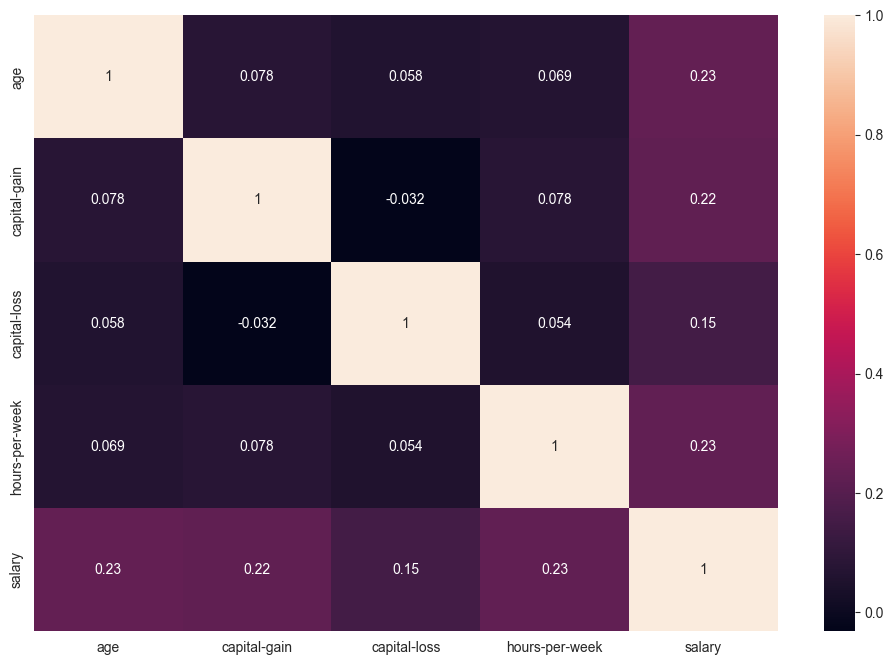

In [38]:
plt.figure(figsize = (12,8), dpi = 100)
sns.heatmap(df.corr(), annot = True);
# heatmap genellikle corr ile calisir. Kardes gibidirler.
# annot parametresi icerideki rakamsal degerleri gosterir.
# Feature'lerin iliskilerini cok daha acik sekilde gorebiliriz.

## Lets Dive into Columns

In [39]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


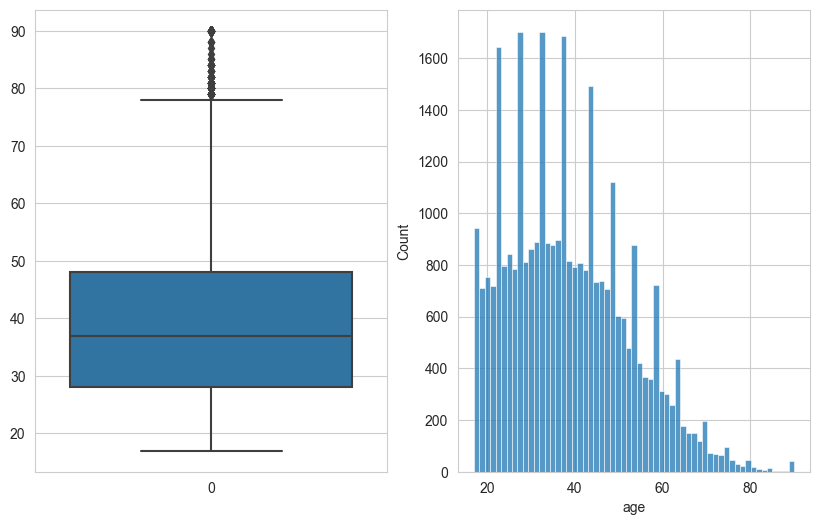

In [40]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)  # 1 satir 2 sutunluk bolgeler ayir ve 1.sine basla
sns.boxplot(data = df.age)  # whis parametresi vardir default 1.5 tir.
plt.subplot(1,2,2)  # 1 satir 2 sutunluk bolgeler ayir ve 2.sine basla
sns.histplot(data = df.age);  # tek parametre verirken data oldugunu belirtmek daha iyi olur

# Outlier'lari belirlemek icin genellikle boxplot'a bakariz.
# Gorsellestirerek incelemek daha iyi sonuclar gormemizi saglar.

In [41]:
# 1.5 whisker icin IQR ile outlier tespiti
q1 = df.age.quantile(0.25)
q1
# Bu method q1 icin kullanilir

28.0

In [42]:
q3 = df.age.quantile(0.75)
q3
# Bu method q3 icin kullanilir

48.0

In [43]:
# IQR icin bu islem yapilmalidir
IQR = q3 - q1
IQR

20.0

In [44]:
# ust limiti bulmak icin bu islem yapilmalidir
high_lim = q3 + IQR*1.5
high_lim

78.0

In [45]:
# alt limiti bulmak icin bu islem yapilmalidir
low_lim = q1 - IQR*1.5
low_lim

-2.0

In [46]:
df[df['age'] > 78]['age'].value_counts()
# Tekrar df icerisine almak verileri gormek icin kullanilir.
# Burada bizim datamizda buldugumuz outlieri bulmak icin kullandigimiz islemdir. 
# Datamizdaki getirdigimiz bu degerler bizim belirledigimiz Outlier degerlerdir.
# Bu degerleri datamizdan dusurebiliriz.
# Outlier verileri biz belirleriz. Istedigimiz gibi sinirlar belirleyebiliriz. Dataya gore bunu belirlemek gerekir.

90    43
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

### hours-per-week

In [47]:
df["hours-per-week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
46       82
18       75
72       71
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
33       39
3        39
39       38
41       36
14       34
2        32
27       30
26       30
17       29
49       29
90       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
57       17
66       17
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
31        5
59        5
96        5
67        4
76        3
81        3
91        3
61        2
86  

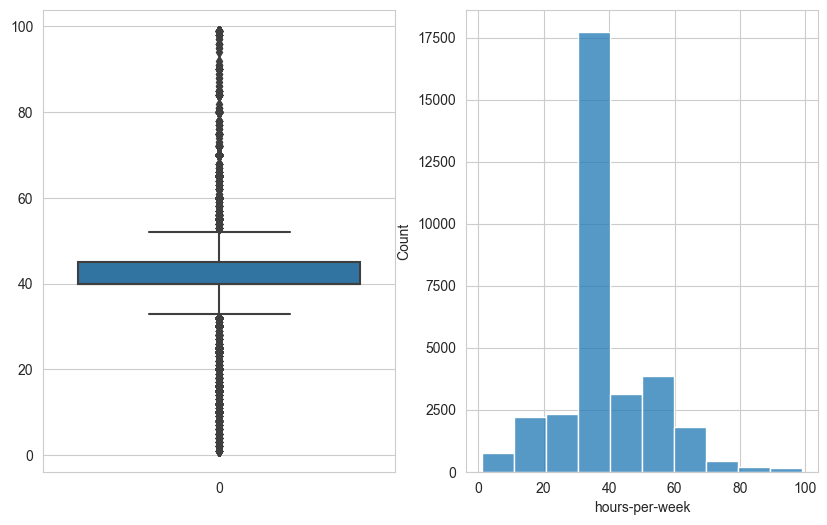

In [48]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.boxplot(data = df["hours-per-week"])  # whis parametresi vardir default 1.5 tir.
plt.subplot(1,2,2)
sns.histplot(data = df["hours-per-week"], bins = 10);

# Outlier'lari belirlemek icin genellikle boxplot'a bakariz.
# Gorsellestirerek incelemek daha iyi sonuclar gormemizi saglar.
# Bu durumda cok fazla outlier cikmis ise bunlari dusurmek yanlis olur. 
# Burada karar verirken datanin durumuna gore bakmak oldukca onemlidir.

In [49]:
q1 = df["hours-per-week"].quantile(0.25)
q3 = df["hours-per-week"].quantile(0.75)
IQR = q3 - q1
high_lim = q3 + IQR*1.5
low_lim = q1 - IQR*1.5

In [50]:
high_lim

52.5

## find outlier values which extends the upper limit in both age and hours-per-week columns

In [51]:
df[(df['age'] > 78) & (df["hours-per-week"] > 52.5)]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,Some-college,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,0
5370,90,Local-gov,Masters,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1
7481,83,Private,HS-grad,Protective-serv,Unmarried,White,Male,0,0,55,United-States,0
7720,84,Private,Masters,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,0
8806,90,Private,Prof-school,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1
11996,90,Private,Bachelors,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,0
12830,81,Private,Masters,Prof-specialty,Unmarried,White,Male,0,0,60,UNKNOWN,0
15356,90,Private,HS-grad,Transport-moving,Unmarried,White,Male,0,0,99,United-States,0
24395,83,Self-emp-inc,Bachelors,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1


In [52]:
# Hem age hem de hours-per-week'te outlier olan verileri buluyoruz.
# Bazi hallerde veri dusurmek isin bu yolu secmek daha mantiklidir.
# Data silerken daha titiz olmak icin bu sekilde yapabiliriz.
drop_indexes = df[(df['age'] > 78) & (df["hours-per-week"] > 52.5)].index
drop_indexes

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [53]:
df.drop(drop_indexes, inplace = True)

In [54]:
df[(df['age'] > 78) & (df["hours-per-week"] > 52.5)]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [55]:
# hours-per-week bu column da 99 saat mantiksiz oldugunu dusunduk
df[df["hours-per-week"] == 99]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
935,37,Private,HS-grad,Craft-repair,Husband,White,Male,0,0,99,United-States,1
1172,25,Private,Masters,Farming-fishing,Unmarried,White,Male,0,0,99,United-States,1
1887,55,Self-emp-not-inc,Some-college,Farming-fishing,Husband,White,Male,0,0,99,United-States,1
3578,37,Self-emp-inc,Doctorate,Prof-specialty,Husband,Black,Male,0,0,99,United-States,1
4086,50,UNKNOWN,10th,UNKNOWN,Husband,White,Male,0,0,99,United-States,0
4308,35,Self-emp-not-inc,HS-grad,Farming-fishing,Husband,White,Male,0,0,99,United-States,0
4441,43,Self-emp-inc,Prof-school,Prof-specialty,Husband,Black,Male,0,0,99,United-States,1
5376,43,Private,Assoc-voc,Craft-repair,Husband,White,Male,0,0,99,United-States,0
5432,44,Private,Prof-school,Prof-specialty,Unmarried,White,Female,2354,0,99,United-States,0
6618,27,Private,HS-grad,Transport-moving,Husband,White,Male,0,0,99,United-States,0


In [56]:
# Hem age hem de hours-per-week'te outlier olan ve bununla birlikte olmasi imkansiz oldugunu dusundugumuz verileri buluyoruz.
# Bu tur aramalarda ve isareti olarak & bu sembol kullanmak gereklidir. Ve iki sarti da parantez icinde yazmak daha uygundur.
# Aksi halde sonuclar yanlis gelebilir veya gelmeyebilir. Hata alabiliriz.
df[(df["hours-per-week"] == 99) & (df['age'] > 70)]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
16604,73,Self-emp-not-inc,7th-8th,Farming-fishing,Husband,White,Male,6418,0,99,United-States,1
19997,72,Private,7th-8th,Other-service,Unmarried,White,Female,0,0,99,UNKNOWN,0


In [57]:
drop_indexes2 = df[(df["hours-per-week"] == 99) & (df['age'] > 70)].index
drop_indexes2

Int64Index([16604, 19997], dtype='int64')

In [58]:
df.drop(drop_indexes2, inplace = True)

## Boxplot and Histplot for all numeric features

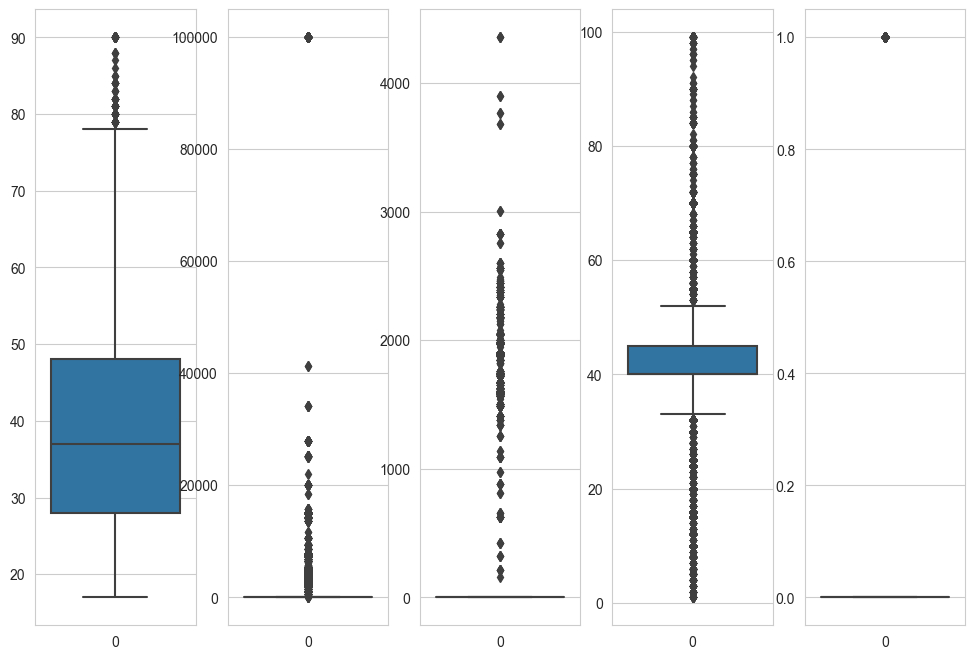

In [59]:
# Data type'i numeric olan sutunlari tek tek boxplot'a atip ayri ayri outlier'larina bakmak icin bu for dongusunu kullandik.
# Genel bir bilgi icin kullanabiliriz.
# select_dtypes('number') numeric degerleri bize getirir.
index = 0
plt.figure(figsize = (12,8))

for col in df.select_dtypes('number').columns:
    index +=1
    plt.subplot(1,5,index)
    sns.boxplot(data = df[col])

## How many of each race are represented in this dataset?

In [60]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [61]:
df.race.value_counts()

White                 27805
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot: xlabel='race', ylabel='count'>

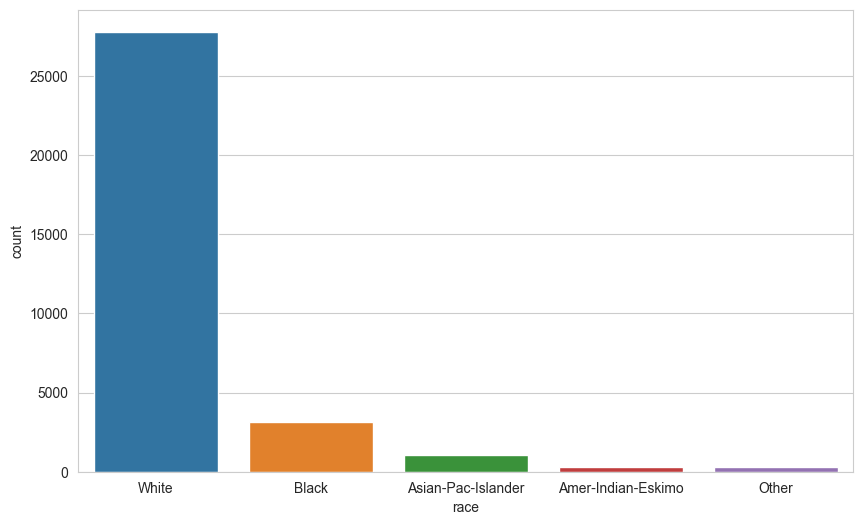

In [62]:
sns.countplot(x = df.race)

## What is the average age of men/women?

In [63]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [64]:
age_men = df[df["sex"] == 'Male']["age"].mean()
age_men

39.412901744719925

In [65]:
age_women = df[df["sex"] == 'Female']["age"].mean()
age_women

36.854967502321266

## What is the percentage of people who have a Bachelor's degree?

In [66]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [67]:
# Sayisini bulma islemlerinde shape kullanmak daha pratik olur.
bachelors = df[df["education"] == "Bachelors"].shape[0]
bachelors

5353

In [68]:
total = df.shape[0]
total

32550

In [69]:
perc_bachelors = bachelors/ total
perc_bachelors

0.1644546850998464

In [70]:
print(f"Toplam data setimizin %{round(perc_bachelors*100,2)} lisans sahibidir")

Toplam data setimizin %16.45 lisans sahibidir


## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [71]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [72]:
# Pandas'ta birkac column'dan veri almak icin veya olarak | bu isareti kullanabiliriz.
# df[(df["education"] == 'Bachelors') | (df["education"] == 'Masters') | (df["education"] == 'Doctorate')]

In [73]:
# Diger getirme yolu da budur. Bu method'la bu column'lari birlikte getirebiliriz.
df[df["education"].isin(['Bachelors','Masters','Doctorate'])]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,Masters,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,Bachelors,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,UNKNOWN,Doctorate,UNKNOWN,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,Masters,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,Masters,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [74]:
high_edu = df[df["education"].isin(['Bachelors','Masters','Doctorate'])]
high_edu

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,Masters,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,Bachelors,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,UNKNOWN,Doctorate,UNKNOWN,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,Masters,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,Masters,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [75]:
high_edu.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,Masters,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1


In [76]:
high_edu.salary.value_counts()

0    4002
1    3484
Name: salary, dtype: int64

In [77]:
high_edu_rich = high_edu[high_edu["salary"] == 1] .shape[0]
high_edu_rich

3484

In [78]:
total = high_edu.shape[0]
total

7486

In [79]:
perc_high_edu_rich = high_edu_rich / total
perc_high_edu_rich

0.4654020838899279

In [80]:
print(f"Ust duzey egitim gormus kisilerin %{round(perc_high_edu_rich*100,2)} zengin")

Ust duzey egitim gormus kisilerin %46.54 zengin


## What percentage of people without advanced education make more than 50K?

In [81]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [82]:
df[~df["education"].isin(['Bachelors','Masters','Doctorate'])]  # ~ Bu isaret disinda anlamina gelir

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
6,49,Private,9th,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
10,37,Private,Some-college,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


In [83]:
low_edu = df[~df["education"].isin(['Bachelors','Masters','Doctorate'])]
low_edu

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
6,49,Private,9th,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
10,37,Private,Some-college,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


In [84]:
low_edu.salary.value_counts()

0    20711
1     4353
Name: salary, dtype: int64

In [85]:
low_edu_rich = low_edu[low_edu.salary == 1].shape[0]
low_edu_rich

4353

In [86]:
total = low_edu.shape[0]
total

25064

In [87]:
perc_low_edu_rich = low_edu_rich / total
perc_low_edu_rich

0.17367539099904244

In [88]:
print(f'Alt düzey eğitim görmüş kişilerin %{round(perc_low_edu_rich*100 , 2)} zengin.')

Alt düzey eğitim görmüş kişilerin %17.37 zengin.


## What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [89]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [90]:
df['hours-per-week'].min()

1

In [91]:
df[(df['hours-per-week'] == df['hours-per-week'].min() & (df['salary'] == 1))]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,Doctorate,Prof-specialty,Husband,White,Male,0,0,1,United-States,1
20072,65,UNKNOWN,HS-grad,UNKNOWN,Husband,White,Male,0,0,1,United-States,1


In [92]:
lazies = df[df['hours-per-week'] == df['hours-per-week'].min()].shape[0]
lazies

20

In [93]:
lazies_rich = df[(df['hours-per-week'] == df['hours-per-week'].min()) & (df['salary'] == 1)].shape[0]
lazies_rich

2

In [94]:
perc_lazy_rich = lazies_rich / lazies
perc_lazy_rich

0.1

In [95]:
print(f'Haftada 1 saat çalışan tembel kişilerin %{round(perc_lazy_rich*100 , 2)} zengin.')

Haftada 1 saat çalışan tembel kişilerin %10.0 zengin.


In [96]:
# perc_high_edu_rich  , perc_low_edu_rich , perc_lazy_rich

if perc_high_edu_rich > perc_low_edu_rich : 
    print('Eğitim önemli. Eğitim alan zengin oluyor.')
else : 
    print('Okumaya gerek yok, okumayan daha zengin')

Eğitim önemli. Eğitim alan zengin oluyor.


 ## What country has the highest percentage of people that earn >50K

In [97]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [98]:
df.groupby('native-country').count()['salary']

native-country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua                        34
Outlying-US(G

In [104]:
country_salary_df = df.groupby('native-country').count()['salary']
country_salary_df

native-country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua                        34
Outlying-US(G

In [100]:
country_riches_df = df[df['salary'] == 1].groupby('native-country')[['salary']].count()
country_riches_df

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [106]:
country_salary_df.loc['Iran']

43

In [108]:
country_salary_df_riches = df[df.salary==1].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [109]:
country_salary_df_riches.loc['Iran'][0]

18

In [111]:
country_salary_df_riches.loc['Iran'][0]/country_salary_df.loc['Iran']

0.4186046511627907

In [113]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary',ascending=True)
rich_per_country

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,UNKNOWN,United-States,Vietnam,Yugoslavia,salary
native-country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dominican-Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El-Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()]

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,UNKNOWN,United-States,Vietnam,Yugoslavia,salary
native-country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [115]:
rich_per_country.sort_values('salary',ascending=False).iloc[[0]]

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,UNKNOWN,United-States,Vietnam,Yugoslavia,salary
native-country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


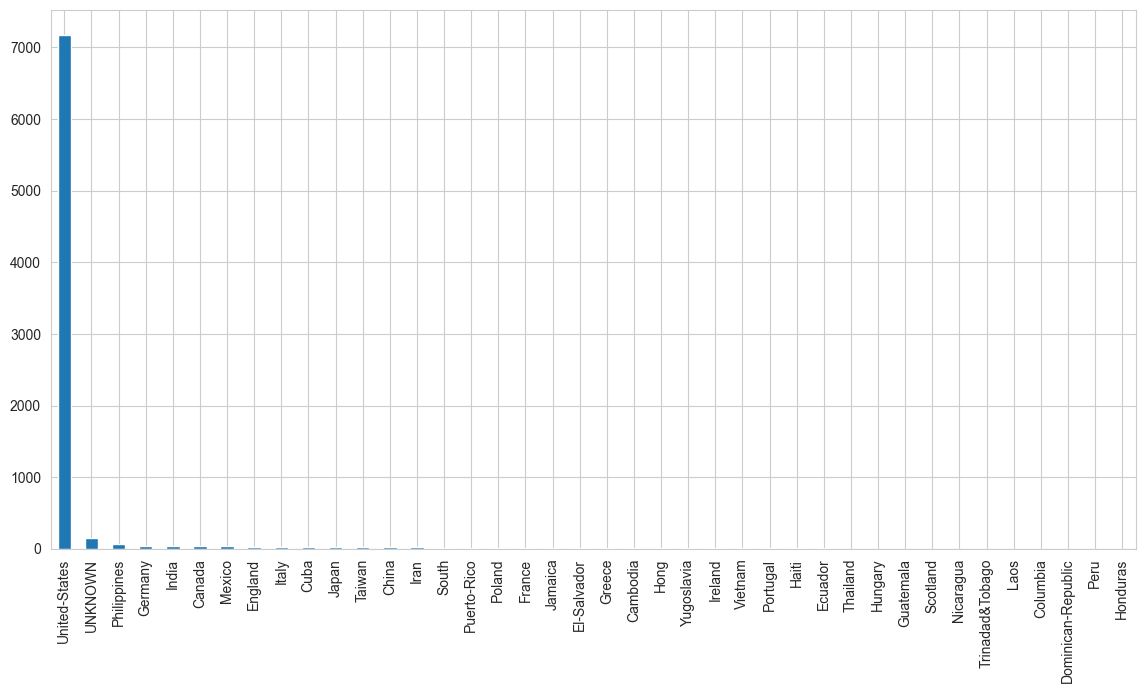

In [116]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == 1, "native-country"].value_counts().plot(kind="bar");

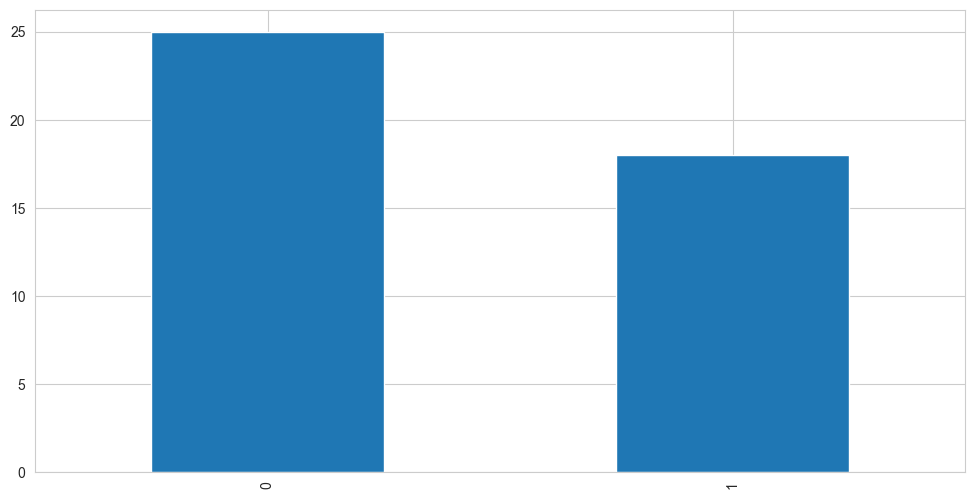

In [117]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

## Identify the most popular occupation for those who earn >50K in India.

In [118]:
top_IN_occupation = (df['native-country']=='India') & (df.salary==1)

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32550, dtype: bool

In [119]:
df[top_IN_occupation]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,Bachelors,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
968,48,Private,Bachelors,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1327,52,Private,HS-grad,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,1
7258,42,State-gov,Prof-school,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,1
7285,54,State-gov,Masters,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
8124,36,Private,Prof-school,Prof-specialty,Unmarried,Other,Male,0,0,40,India,1
9939,43,Federal-gov,Prof-school,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,1
10590,35,Private,Prof-school,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,1
10661,59,Private,Prof-school,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,1
10736,30,Private,Prof-school,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,1


In [120]:
df[top_IN_occupation]['occupation'].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [121]:
df[top_IN_occupation]['occupation'].value_counts().index[0]

'Prof-specialty'

In [122]:
df[top_IN_occupation]['occupation'].value_counts()[0]

25

In [123]:
a =  df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [124]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


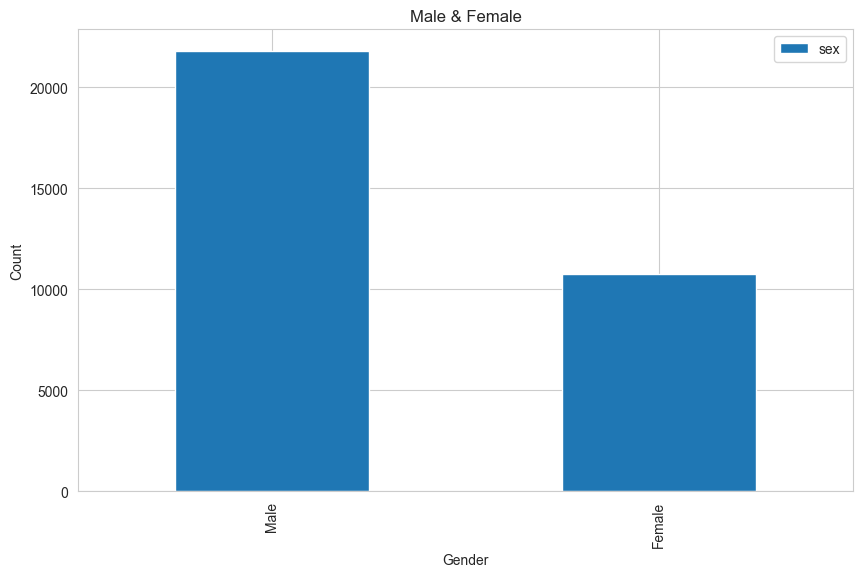

In [125]:
df["sex"].value_counts().plot(kind="bar");
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male & Female")
plt.legend();

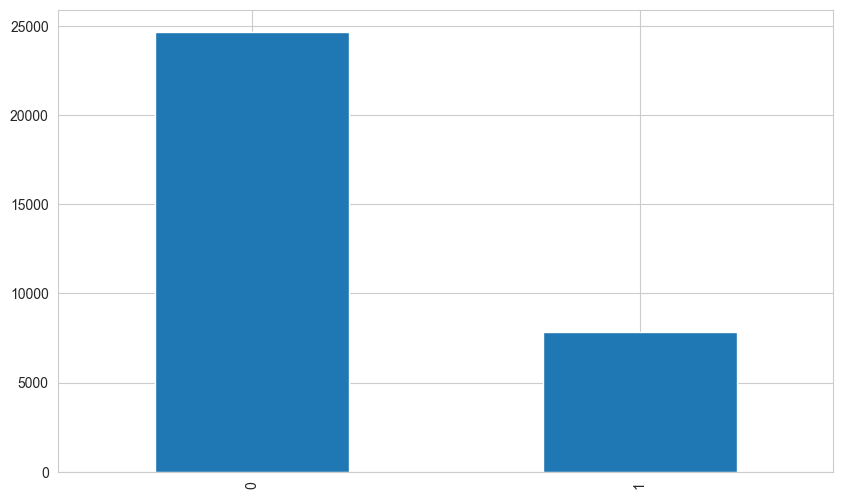

In [126]:
df["salary"].value_counts().plot(kind="bar")
plt.show()

In [127]:
pie1 = df.race.value_counts()
pie1_list = [float(each) for each in df.race.value_counts()]
pie1_list

[27805.0, 3124.0, 1039.0, 311.0, 271.0]

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px 

labels = df.race.unique()
# figure
fig = {
    "data" : [
        {
            "values" : pie1_list,
            "labels" : labels,
            "domain" : {"x": [0, 0.5]},
            "name" : "Number Of Race",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2,0.2]    # exploded
        },
    ],
    "layout" : {
        "title" : "Race Rates",
        "annotations" : [
            {"font" : {"size" : 10},
             "text" : "Number of race ",
             "x" : 0.3,
             "y" : 0.9
            },
        
        ],
   
    }
}
iplot(fig)

In [128]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

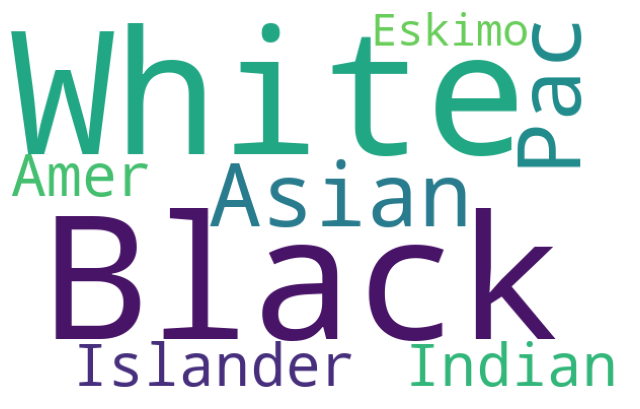

In [129]:
from wordcloud import WordCloud
 
RACE = df.race.unique()

plt.subplots(figsize = (8, 8))
wordcloud = WordCloud(
                        background_color= "white",
                        width = 612,
                        height= 384).generate(" ".join(RACE))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer

plt.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px 

labels = df.race.unique()
# figure
fig = {
    "data" : [
        {
            "values" : pie1_list,
            "labels" : labels,
            "domain" : {"x": [0, 0.5]},
            "name" : "Number Of Race",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2,0.2]    # exploded
        },
    ],
    "layout" : {
        "title" : "Race Rates",
        "annotations" : [
            {"font" : {"size" : 10},
             "text" : "Number of race ",
             "x" : 0.3,
             "y" : 0.9
            },
        
        ],
   
    }
}
iplot(fig)